File to run PCA on the simulation data using a python library rather than ptraj with PCs calculated just using the WT simulation data. 

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm

import mdtraj as md
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Load in the simulation data (every 10 frames)
traj_new = []
traj_new.append(md.load_netcdf("/data/nvanhoorn/A3F_newstructure/VCBC_A3F_GLU_mut/redoing_everything/mdcrd/VCBC-A3F_GLU_mut_sims1-8_first300_noBox.mdcrd", 
                          top="/data/nvanhoorn/A3F_newstructure/VCBC_A3F_GLU_mut/redoing_everything/VCBC-A3F_GLU_mut_nowat.prmtop", stride=10))
traj_new.append(md.load_netcdf("/data/nvanhoorn/A3F_newstructure/VCBC_A3F_GLU_mut/redoing_everything/WT_files/VCBC-A3F_WT_sims1-8_first300_noBox.mdcrd", 
                          top="/data/nvanhoorn/A3F_newstructure/VCBC_A3F_GLU_mut/redoing_everything/WT_files/VCBC-A3F_WT_nowat.prmtop", stride=10))

In [3]:
starting_struct = md.load_pdb("/data/nvanhoorn/A3F_newstructure/VCBC_A3F_GLU_mut/redoing_everything/WT_files/VCBC-A3F_WT_tleap.pdb")

In [4]:
traj_new

[<mdtraj.Trajectory with 48000 frames, 12053 atoms, 747 residues, without unitcells at 0x155413143e60>,
 <mdtraj.Trajectory with 48000 frames, 12060 atoms, 747 residues, without unitcells at 0x1554131dc0e0>]

In [5]:
# Remove atoms that are not a part of the backbone
traj_new[0].atom_slice(traj_new[0].topology.select('backbone'), inplace=True)
traj_new[1].atom_slice(traj_new[1].topology.select('backbone'), inplace=True)
starting_struct.atom_slice(traj_new[1].topology.select('backbone'), inplace=True)

<mdtraj.Trajectory with 1 frames, 2968 atoms, 178 residues, without unitcells at 0x1554137483e0>

In [6]:
# # align the trajectories
traj_new[1].superpose(traj_new[0])
traj_new[0].superpose(traj_new[0])
starting_struct.superpose(traj_new[0])

<mdtraj.Trajectory with 1 frames, 2968 atoms, 178 residues, without unitcells at 0x1554137483e0>

In [7]:
# Extract the x,y,z coordinates fromt the trajectory objects
coordinatesGLU = traj_new[0].xyz
coordinatesWT = traj_new[1].xyz
Startcoordinates = starting_struct.xyz

print(coordinatesGLU.shape, coordinatesWT.shape, Startcoordinates.shape)

(48000, 2968, 3) (48000, 2968, 3) (1, 2968, 3)


In [8]:
train_data = coordinatesWT

print(train_data.shape)  

train_data = train_data[::]

(48000, 2968, 3)


In [9]:
# Flatten to (n_frames, n_atoms * 3)

train_data = train_data.reshape(train_data.shape[0], -1) 
start_struct_data = Startcoordinates.reshape(Startcoordinates.shape[0], -1)
print(train_data.shape)

(48000, 8904)


In [10]:
train_data

array([[ 3.1301713,  4.249012 , 11.932121 , ...,  4.0319552,  3.6012862,
        14.343506 ],
       [ 2.9979024,  4.309089 , 11.934357 , ...,  4.1022334,  3.2057388,
        13.947191 ],
       [ 3.079134 ,  4.30974  , 11.960889 , ...,  4.097901 ,  3.2815475,
        13.746042 ],
       ...,
       [ 3.1386228,  4.244601 , 12.302906 , ...,  4.2199764,  2.8939617,
        13.880112 ],
       [ 3.0978749,  4.393424 , 12.362138 , ...,  4.200395 ,  2.8731737,
        13.848095 ],
       [ 3.131182 ,  4.2506995, 12.338176 , ...,  4.292874 ,  2.7783258,
        13.914901 ]], dtype=float32)

In [11]:
# PCA tutorial used : https://www.geeksforgeeks.org/principal-component-analysis-pca/

In [12]:
n_components=10
pca = PCA(n_components=n_components)
pca.fit(train_data)


x_pca = pca.transform(train_data)

# Create the dataframe
df_pca1 = pd.DataFrame(x_pca,
                       columns=['PC{}'.
                       format(i+1)
                        for i in range(n_components)])

In [13]:
df_pca1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-6.875872,-10.574036,-4.814801,-1.740178,0.186352,1.911085,9.444052,2.142747,-3.756367,-2.478655
1,-6.419689,-10.445633,-6.232438,-2.615793,1.133635,2.180158,9.054451,1.081219,-4.016676,-1.494457
2,-9.118668,-8.576935,-6.487597,-1.355606,0.807989,2.958920,10.420957,1.096893,-3.447620,-1.716505
3,-8.196894,-7.293015,-6.209781,-1.589605,1.179010,1.752931,11.448769,-0.352243,-3.083307,-0.242323
4,-5.519510,-6.885422,-6.285071,-3.096477,0.160805,0.752828,12.154831,-1.627869,-2.396238,0.398502
...,...,...,...,...,...,...,...,...,...,...
47995,-9.401863,-2.817436,2.556499,12.734116,-8.712778,-2.967030,-1.124403,-3.232059,1.180022,3.077969
47996,-10.035606,-3.288269,1.662617,11.923232,-8.345327,-3.264853,-1.019278,-3.801220,1.128792,3.193033
47997,-9.033825,-4.236458,1.773280,13.092652,-7.601894,-3.008071,-0.307226,-4.109457,1.645046,3.151529
47998,-9.241680,-3.268089,2.505744,13.010221,-7.862591,-2.771911,-0.780260,-3.942078,1.484774,2.683928


In [14]:
GLU_data = coordinatesGLU.reshape(coordinatesGLU.shape[0], -1) 
WT_data = coordinatesWT.reshape(coordinatesWT.shape[0], -1) 

In [15]:
GLU_pca = pca.transform(GLU_data)

# Create the dataframe
df_pca_GLU = pd.DataFrame(GLU_pca,
                       columns=['PC{}'.
                       format(i+1)
                        for i in range(n_components)])

In [16]:
df_pca_GLU

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-8.497620,-1.534134,-1.359882,-1.876907,0.269815,3.779235,10.335557,0.643262,-2.791210,0.571161
1,-12.074991,-3.144318,-3.446204,-2.432295,-0.411531,3.159086,10.317855,1.019474,-2.271688,0.276369
2,-12.112095,-3.759422,-3.405272,-2.285786,-0.326548,3.337732,10.014326,1.097933,-2.061314,0.399803
3,-13.973080,-6.390602,-1.265290,-1.622774,-0.679480,3.339349,9.324714,3.011324,-1.790731,-0.496021
4,-14.599457,-6.268753,-1.516743,-1.748901,-1.156799,3.853857,9.783129,3.130251,-1.630402,-0.646147
...,...,...,...,...,...,...,...,...,...,...
47995,-11.047081,5.750252,-2.335538,3.282146,4.251749,2.567738,0.541133,5.549233,-6.046827,-6.164238
47996,-11.327152,6.367111,-4.374894,3.038221,4.208250,1.698077,0.721380,4.225649,-5.630657,-4.816381
47997,-10.298351,7.845444,-3.599161,3.404946,3.606871,0.954353,1.487669,5.560156,-5.562984,-5.289463
47998,-8.765104,7.475792,-2.884495,3.350508,3.768320,1.224372,1.006823,6.085530,-6.002226,-5.352514


In [17]:
WT_pca = pca.transform(WT_data)

# Create the dataframe
df_pca_WT = pd.DataFrame(WT_pca,
                       columns=['PC{}'.
                       format(i+1)
                        for i in range(n_components)])

In [18]:
df_pca_WT

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-6.875872,-10.574036,-4.814801,-1.740178,0.186352,1.911085,9.444052,2.142747,-3.756367,-2.478655
1,-6.419689,-10.445633,-6.232438,-2.615793,1.133635,2.180158,9.054451,1.081219,-4.016676,-1.494457
2,-9.118668,-8.576935,-6.487597,-1.355606,0.807989,2.958920,10.420957,1.096893,-3.447620,-1.716505
3,-8.196894,-7.293015,-6.209781,-1.589605,1.179010,1.752931,11.448769,-0.352243,-3.083307,-0.242323
4,-5.519510,-6.885422,-6.285071,-3.096477,0.160805,0.752828,12.154831,-1.627869,-2.396238,0.398502
...,...,...,...,...,...,...,...,...,...,...
47995,-9.401863,-2.817436,2.556499,12.734116,-8.712778,-2.967030,-1.124403,-3.232059,1.180022,3.077969
47996,-10.035606,-3.288269,1.662617,11.923232,-8.345327,-3.264853,-1.019278,-3.801220,1.128792,3.193033
47997,-9.033825,-4.236458,1.773280,13.092652,-7.601894,-3.008071,-0.307226,-4.109457,1.645046,3.151529
47998,-9.241680,-3.268089,2.505744,13.010221,-7.862591,-2.771911,-0.780260,-3.942078,1.484774,2.683928


In [19]:
struct_pca = pca.transform(start_struct_data)

# Create the dataframe
df_pca_struct = pd.DataFrame(struct_pca,
                       columns=['PC{}'.
                       format(i+1)
                        for i in range(n_components)])

In [20]:
df_pca_struct

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-19.663746,-66.750336,-0.987955,-5.459752,-26.449032,-6.776182,16.08617,0.837379,20.815239,-9.232826


### Classic figures

In [21]:
PC1min = min(min(GLU_pca[:, 0]), min(WT_pca[:, 0])) - 25
PC1max = max(max(GLU_pca[:, 0]), max(WT_pca[:, 0])) + 25
PC2min = min(min(GLU_pca[:, 1]), min(WT_pca[:, 1])) - 25
PC2max = max(max(GLU_pca[:, 1]), max(WT_pca[:, 1])) + 25
PC3min = min(min(GLU_pca[:, 2]), min(WT_pca[:, 2])) - 25
PC3max = max(max(GLU_pca[:, 2]), max(WT_pca[:, 2])) + 25
PC4min = min(min(GLU_pca[:, 3]), min(WT_pca[:, 3])) - 25
PC4max = max(max(GLU_pca[:, 3]), max(WT_pca[:, 3])) + 25

Text(0, 0.5, 'PC2')

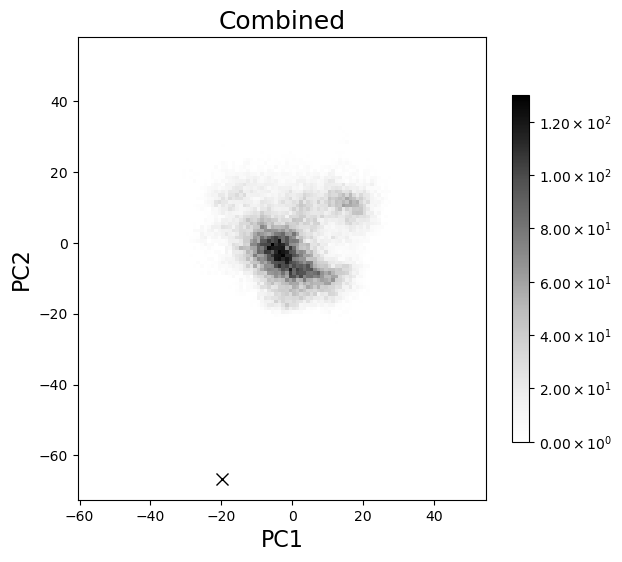

In [39]:
binedges = np.arange(-550,550,1) # create array for bin edges
GLU_fig = np.histogram2d(df_pca1['PC1'], df_pca1['PC2'], 
                         bins=binedges)
max_shade = GLU_fig[0].max()
PC1_2_colormap = plt.figure(figsize=(14.5,9))
plt.subplot(1, 2, 1)
PC2_VCBC, PC1_VCBC = np.meshgrid(binedges,binedges) 
plt.pcolormesh(PC1_VCBC, PC2_VCBC, GLU_fig[0], cmap = 'Greys', vmax = max_shade)
plt.axis('image')
plt.xlim([PC1min, PC1max])
plt.ylim([PC2min-25, PC2max])
def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)
plt.colorbar(shrink = 0.50, format=ticker.FuncFormatter(fmt))
plt.scatter(x = df_pca_struct["PC1"][0], y = df_pca_struct["PC2"][0], color='k', 
         marker='x', s = 75, linewidth = 1, label = "VCBC pdb")
plt.title('Combined', size= 18) 
plt.xlabel('PC1',size= 16) 
plt.ylabel('PC2',size= 16)

Text(0, 0.5, 'PC2')

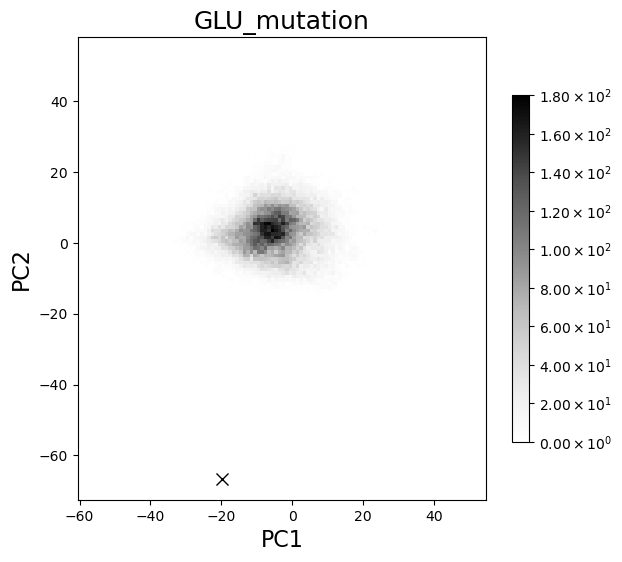

In [40]:
binedges = np.arange(-550,550,1) # create array for bin edges
GLU_fig = np.histogram2d(df_pca_GLU['PC1'], df_pca_GLU['PC2'], 
                         bins=binedges)
max_shade = GLU_fig[0].max()
PC1_2_colormap = plt.figure(figsize=(14.5,9))
plt.subplot(1, 2, 1)
PC2_VCBC, PC1_VCBC = np.meshgrid(binedges,binedges) 
plt.pcolormesh(PC1_VCBC, PC2_VCBC, GLU_fig[0], cmap = 'Greys', vmax = max_shade)
plt.axis('image')
plt.xlim([PC1min, PC1max])
plt.ylim([PC2min-25, PC2max])
def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)
plt.colorbar(shrink = 0.50, format=ticker.FuncFormatter(fmt))
plt.scatter(x = df_pca_struct["PC1"][0], y = df_pca_struct["PC2"][0], color='k', 
         marker='x', s = 75, linewidth = 1, label = "VCBC pdb")
plt.title('GLU_mutation', size= 18) 
plt.xlabel('PC1',size= 16) 
plt.ylabel('PC2',size= 16)

Text(0, 0.5, 'PC2')

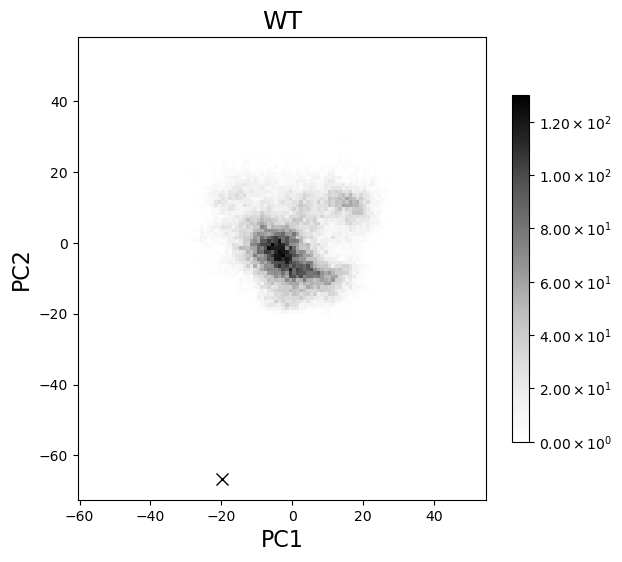

In [41]:
binedges = np.arange(-550,550,1) # create array for bin edges

WT_fig = np.histogram2d(df_pca_WT['PC1'], df_pca_WT['PC2'], 
                         bins=binedges)
max_shade = WT_fig[0].max()
PC1_2_colormap = plt.figure(figsize=(14.5,9))
plt.subplot(1, 2, 1)
PC2_VCBC, PC1_VCBC = np.meshgrid(binedges,binedges) 
plt.pcolormesh(PC1_VCBC,PC2_VCBC,WT_fig[0], cmap = 'Greys', vmax = max_shade)
plt.axis('image')
plt.xlim([PC1min, PC1max])
plt.ylim([PC2min-25, PC2max])

plt.colorbar(shrink = 0.50, format=ticker.FuncFormatter(fmt))
plt.scatter(x = df_pca_struct["PC1"][0], y = df_pca_struct["PC2"][0], color='k', 
         marker='x', s = 75, linewidth = 1, label = "VCBC pdb")
plt.title('WT', size= 18) 
plt.xlabel('PC1',size= 16) 
plt.ylabel('PC2',size= 16)

Text(0, 0.5, 'PC4')

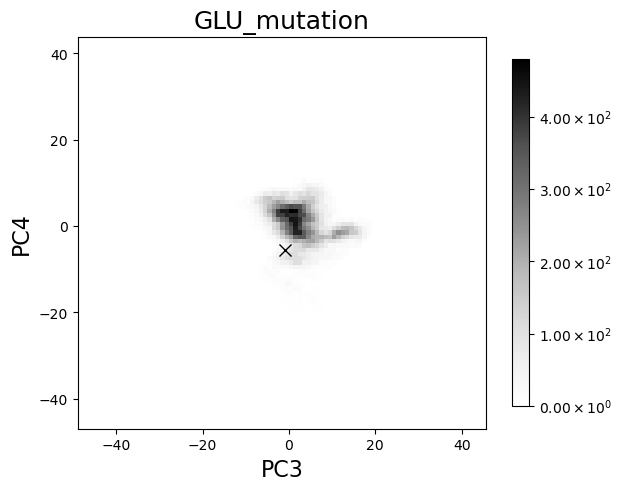

In [25]:
binedges = np.arange(-550,550,1) # create array for bin edges
GLU_fig = np.histogram2d(df_pca_GLU['PC3'], df_pca_GLU['PC4'], 
                         bins=binedges)
max_shade = GLU_fig[0].max()
PC1_2_colormap = plt.figure(figsize=(14.5,9))
plt.subplot(1, 2, 1)
PC2_VCBC, PC1_VCBC = np.meshgrid(binedges,binedges) 

plt.pcolormesh(PC1_VCBC, PC2_VCBC, GLU_fig[0], cmap = 'Greys', vmax = max_shade)
plt.axis('image')
plt.xlim([PC3min, PC3max])
plt.ylim([PC4min, PC4max])

plt.colorbar(shrink = 0.50, format=ticker.FuncFormatter(fmt))
plt.scatter(x = df_pca_struct["PC3"][0], y = df_pca_struct["PC4"][0], color='k', 
         marker='x', s = 75, linewidth = 1, label = "VCBC pdb")
plt.title('GLU_mutation', size= 18) 
plt.xlabel('PC3',size= 16) 
plt.ylabel('PC4',size= 16)

Text(0, 0.5, 'PC4')

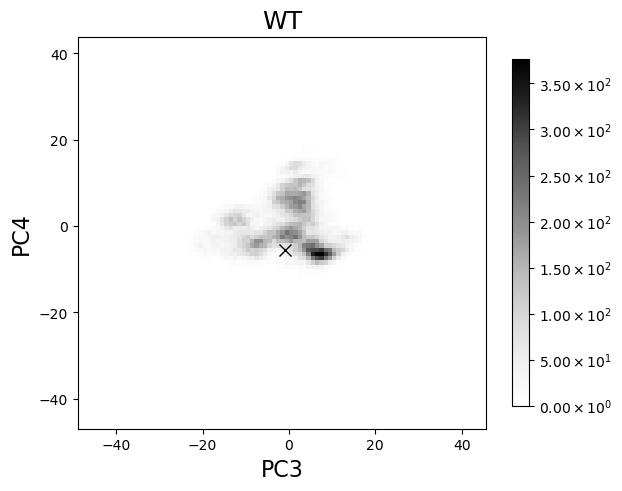

In [26]:
binedges = np.arange(-50,45,1) # create array for bin edges

WT_fig = np.histogram2d(df_pca_WT['PC3'], df_pca_WT['PC4'], 
                         bins=binedges)
max_shade = WT_fig[0].max()
PC1_2_colormap = plt.figure(figsize=(14.5,9))
plt.subplot(1, 2, 1)
PC2_VCBC, PC1_VCBC = np.meshgrid(binedges,binedges) 
plt.pcolormesh(PC1_VCBC,PC2_VCBC,WT_fig[0], cmap = 'Greys', vmax = max_shade)
plt.axis('image')
plt.xlim([PC3min, PC3max])
plt.ylim([PC4min, PC4max])

plt.colorbar(shrink = 0.50, format=ticker.FuncFormatter(fmt))
plt.scatter(x = df_pca_struct["PC3"][0], y = df_pca_struct["PC4"][0], color='k', 
         marker='x', s = 75, linewidth = 1, label = "VCBC pdb")
plt.title('WT', size= 18) 
plt.xlabel('PC3',size= 16) 
plt.ylabel('PC4',size= 16)

In [27]:
df_pca_GLU.std()

PC1     8.348346
PC2     6.202014
PC3     5.088154
PC4     4.451966
PC5     2.626523
PC6     2.065582
PC7     3.651804
PC8     3.189008
PC9     3.563189
PC10    2.596418
dtype: float32

In [28]:
df_pca_WT.std()

PC1     10.195422
PC2      9.364781
PC3      7.417020
PC4      5.858609
PC5      4.549556
PC6      3.916376
PC7      3.691429
PC8      3.616378
PC9      3.094084
PC10     2.978712
dtype: float32

In [29]:
df_pca_GLU.mean()

PC1    -5.142763
PC2     3.402155
PC3     2.721104
PC4     0.440549
PC5     1.284526
PC6    -0.276096
PC7     3.702769
PC8     0.429415
PC9     0.056805
PC10   -1.772215
dtype: float32

In [30]:
df_pca_WT.mean()

PC1     5.798105e-05
PC2    -4.758596e-05
PC3    -2.118750e-05
PC4    -4.856388e-06
PC5    -7.044037e-06
PC6     2.742509e-07
PC7     9.144082e-05
PC8    -5.500543e-05
PC9    -2.199628e-05
PC10   -1.484942e-05
dtype: float32

In [42]:
#The amount of variance explained by each of the selected components. The variance estimation uses n_samples - 1 degrees of freedom.
#Equal to n_components largest eigenvalues of the covariance matrix of X.
print (f" Amount of variance explained by top ten components: {pca.explained_variance_}")
print()

# Percentage of variance explained by each of the selected components.
# If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.
print (f" Percentage of variance explained by the top ten components: {pca.explained_variance_ratio_}")
print()

# returns a vector x such that x[i] returns the cumulative variance explained by the first i+1 dimensions.
# https://stackoverflow.com/questions/32857029/python-scikit-learn-pca-explained-variance-ratio-cutoff
print (f" Cumulative variance explained by the top ten components: {pca.explained_variance_ratio_.cumsum()}")

 Amount of variance explained by top ten components: [103.94671   87.69884   55.012207  34.32327   20.698462  15.337993
  13.626647  13.07818    9.573361   8.87273 ]

 Percentage of variance explained by the top ten components: [0.22720456 0.1916903  0.12024454 0.07502308 0.04524227 0.03352547
 0.02978484 0.02858602 0.02092525 0.01939383]

 Cumulative variance explained by the top ten components: [0.22720456 0.41889486 0.5391394  0.61416245 0.6594047  0.69293016
 0.722715   0.75130105 0.77222633 0.79162014]


## P values

Adapted from "Permutation_PCA" notebook

In [43]:
GLU_pca = df_pca_GLU
WT_pca = df_pca_WT
pdb_PCA = df_pca_struct

In [44]:
GLU_Mean_std_PC1and2 = {"Simulation":["1","2","3","4","5","6","7","8"],
                    'Mean_PC1':[GLU_pca['PC1'][1:6000:10].mean(),
                    GLU_pca['PC1'][6001:12000:10].mean(),
                    GLU_pca['PC1'][12001:18000:10].mean(),
                    GLU_pca['PC1'][18001:24000:10].mean(),
                    GLU_pca['PC1'][24001:30000:10].mean(),
                    GLU_pca['PC1'][30001:36000:10].mean(),
                    GLU_pca['PC1'][36001:42000:10].mean(),
                    GLU_pca['PC1'][42001:48000:10].mean()], 
     'Variance_PC1':[GLU_pca['PC1'][1:6000:10].var(),
                    GLU_pca['PC1'][6001:12000:10].var(),
                    GLU_pca['PC1'][12001:18000:10].var(),
                    GLU_pca['PC1'][18001:24000:10].var(),
                    GLU_pca['PC1'][24001:30000:10].var(),
                    GLU_pca['PC1'][30001:36000:10].var(),
                    GLU_pca['PC1'][36001:42000:10].var(),
                    GLU_pca['PC1'][42001:48000:10].var()],
     'Mean_PC2': [GLU_pca['PC2'][1:6000:10].mean(),
                    GLU_pca['PC2'][6001:12000:10].mean(),
                    GLU_pca['PC2'][12001:18000:10].mean(),
                    GLU_pca['PC2'][18001:24000:10].mean(),
                    GLU_pca['PC2'][24001:30000:10].mean(),
                    GLU_pca['PC2'][30001:36000:10].mean(),
                    GLU_pca['PC2'][36001:42000:10].mean(),
                    GLU_pca['PC2'][42001:48000:10].mean()],
     "Variance_PC2":[GLU_pca['PC2'][1:6000:10].var(),
                    GLU_pca['PC2'][6001:12000:10].var(),
                    GLU_pca['PC2'][12001:18000:10].var(),
                    GLU_pca['PC2'][18001:24000:10].var(),
                    GLU_pca['PC2'][24001:30000:10].var(),
                    GLU_pca['PC2'][30001:36000:10].var(),
                    GLU_pca['PC2'][36001:42000:10].var(),
                    GLU_pca['PC2'][42001:48000:10].var()],
     'Mean_PC3': [GLU_pca['PC3'][1:6000:10].mean(),
                    GLU_pca['PC3'][6001:12000:10].mean(),
                    GLU_pca['PC3'][12001:18000:10].mean(),
                    GLU_pca['PC3'][18001:24000:10].mean(),
                    GLU_pca['PC3'][24001:30000:10].mean(),
                    GLU_pca['PC3'][30001:36000:10].mean(),
                    GLU_pca['PC3'][36001:42000:10].mean(),
                    GLU_pca['PC3'][42001:48000:10].mean()],
     "Variance_PC3":[GLU_pca['PC3'][1:6000:10].var(),
                    GLU_pca['PC3'][6001:12000:10].var(),
                    GLU_pca['PC3'][12001:18000:10].var(),
                    GLU_pca['PC3'][18001:24000:10].var(),
                    GLU_pca['PC3'][24001:30000:10].var(),
                    GLU_pca['PC3'][30001:36000:10].var(),
                    GLU_pca['PC3'][36001:42000:10].var(),
                    GLU_pca['PC3'][42001:48000:10].var()],
     'Mean_PC4': [GLU_pca['PC4'][1:6000:10].mean(),
                    GLU_pca['PC4'][6001:12000:10].mean(),
                    GLU_pca['PC4'][12001:18000:10].mean(),
                    GLU_pca['PC4'][18001:24000:10].mean(),
                    GLU_pca['PC4'][24001:30000:10].mean(),
                    GLU_pca['PC4'][30001:36000:10].mean(),
                    GLU_pca['PC4'][36001:42000:10].mean(),
                    GLU_pca['PC4'][42001:48000:10].mean()],
     "Variance_PC4":[GLU_pca['PC4'][1:6000:10].var(),
                    GLU_pca['PC4'][6001:12000:10].var(),
                    GLU_pca['PC4'][12001:18000:10].var(),
                    GLU_pca['PC4'][18001:24000:10].var(),
                    GLU_pca['PC4'][24001:30000:10].var(),
                    GLU_pca['PC4'][30001:36000:10].var(),
                    GLU_pca['PC4'][36001:42000:10].var(),
                    GLU_pca['PC4'][42001:48000:10].var()],
            "PDB_PC1":[pdb_PCA["PC1"].values,
                     pdb_PCA["PC1"].values,
                     pdb_PCA["PC1"].values,
                     pdb_PCA["PC1"].values,
                     pdb_PCA["PC1"].values,
                     pdb_PCA["PC1"].values,
                     pdb_PCA["PC1"].values,
                     pdb_PCA["PC1"].values],
            "PDB_PC2":[pdb_PCA["PC2"].values,
                     pdb_PCA["PC2"].values,
                     pdb_PCA["PC2"].values,
                     pdb_PCA["PC2"].values,
                     pdb_PCA["PC2"].values,
                     pdb_PCA["PC2"].values,
                     pdb_PCA["PC2"].values,
                     pdb_PCA["PC2"].values],
            "PDB_PC3":[pdb_PCA["PC3"].values,
                     pdb_PCA["PC3"].values,
                     pdb_PCA["PC3"].values,
                     pdb_PCA["PC3"].values,
                     pdb_PCA["PC3"].values,
                     pdb_PCA["PC3"].values,
                     pdb_PCA["PC3"].values,
                     pdb_PCA["PC3"].values],
            "PDB_PC4":[pdb_PCA["PC4"].values,
                     pdb_PCA["PC4"].values,
                     pdb_PCA["PC4"].values,
                     pdb_PCA["PC4"].values,
                     pdb_PCA["PC4"].values,
                     pdb_PCA["PC4"].values,
                     pdb_PCA["PC4"].values,
                     pdb_PCA["PC4"].values],}
GLU_Mean_std_PC1and2_df = pd.DataFrame(data = GLU_Mean_std_PC1and2)
# GLU_Mean_std_PC1and2_df["Meandiffsqr_PC1"]= (GLU_Mean_std_PC1and2_df["Mean_PC1"]- GLU_Mean_std_PC1and2_df["PDB_PC1"])**2
# GLU_Mean_std_PC1and2_df["Meandiffsqr_PC2"]= (GLU_Mean_std_PC1and2_df["Mean_PC2"]- GLU_Mean_std_PC1and2_df["PDB_PC2"])**2
# GLU_Mean_std_PC1and2_df["Meandiffsqr_PC3"]= (GLU_Mean_std_PC1and2_df["Mean_PC3"]- GLU_Mean_std_PC1and2_df["PDB_PC3"])**2
# GLU_Mean_std_PC1and2_df["Meandiffsqr_PC4"]= (GLU_Mean_std_PC1and2_df["Mean_PC4"]- GLU_Mean_std_PC1and2_df["PDB_PC4"])**2

GLU_Mean_std_PC1and2_df["Meandiffsqr_PC1"]= (GLU_Mean_std_PC1and2_df["PDB_PC1"] -GLU_Mean_std_PC1and2_df["Mean_PC1"])**2
GLU_Mean_std_PC1and2_df["Meandiffsqr_PC2"]= (GLU_Mean_std_PC1and2_df["PDB_PC1"]- GLU_Mean_std_PC1and2_df["Mean_PC1"])**2
GLU_Mean_std_PC1and2_df["Meandiffsqr_PC3"]= (GLU_Mean_std_PC1and2_df["PDB_PC1"]- GLU_Mean_std_PC1and2_df["Mean_PC1"])**2
GLU_Mean_std_PC1and2_df["Meandiffsqr_PC4"]= (GLU_Mean_std_PC1and2_df["PDB_PC1"]- GLU_Mean_std_PC1and2_df["Mean_PC1"])**2
# GLU_Mean_std_PC1and2_df


In [45]:
WT_Mean_std_PC1and2 = {"Simulation":["1","2","3","4","5","6","7","8"],
                    'Mean_PC1':[WT_pca['PC1'][1:6000:10].mean(),
                    WT_pca['PC1'][6001:12000:10].mean(),
                    WT_pca['PC1'][12001:18000:10].mean(),
                    WT_pca['PC1'][18001:24000:10].mean(),
                    WT_pca['PC1'][24001:30000:10].mean(),
                    WT_pca['PC1'][30001:36000:10].mean(),
                    WT_pca['PC1'][36001:42000:10].mean(),
                    WT_pca['PC1'][42001:48000:10].mean()], 
     'Variance_PC1':[WT_pca['PC1'][1:6000:10].var(),
                    WT_pca['PC1'][6001:12000:10].var(),
                    WT_pca['PC1'][12001:18000:10].var(),
                    WT_pca['PC1'][18001:24000:10].var(),
                    WT_pca['PC1'][24001:30000:10].var(),
                    WT_pca['PC1'][30001:36000:10].var(),
                    WT_pca['PC1'][36001:42000:10].var(),
                    WT_pca['PC1'][42001:48000:10].var()],
     'Mean_PC2': [WT_pca['PC2'][1:6000:10].mean(),
                    WT_pca['PC2'][6001:12000:10].mean(),
                    WT_pca['PC2'][12001:18000:10].mean(),
                    WT_pca['PC2'][18001:24000:10].mean(),
                    WT_pca['PC2'][24001:30000:10].mean(),
                    WT_pca['PC2'][30001:36000:10].mean(),
                    WT_pca['PC2'][36001:42000:10].mean(),
                    WT_pca['PC2'][42001:48000:10].mean()],
     "Variance_PC2":[WT_pca['PC2'][1:6000:10].var(),
                    WT_pca['PC2'][6001:12000:10].var(),
                    WT_pca['PC2'][12001:18000:10].var(),
                    WT_pca['PC2'][18001:24000:10].var(),
                    WT_pca['PC2'][24001:30000:10].var(),
                    WT_pca['PC2'][30001:36000:10].var(),
                    WT_pca['PC2'][36001:42000:10].var(),
                    WT_pca['PC2'][42001:48000:10].var()],
     'Mean_PC3': [WT_pca['PC3'][1:6000:10].mean(),
                    WT_pca['PC3'][6001:12000:10].mean(),
                    WT_pca['PC3'][12001:18000:10].mean(),
                    WT_pca['PC3'][18001:24000:10].mean(),
                    WT_pca['PC3'][24001:30000:10].mean(),
                    WT_pca['PC3'][30001:36000:10].mean(),
                    WT_pca['PC3'][36001:42000:10].mean(),
                    WT_pca['PC3'][42001:48000:10].mean()],
     "Variance_PC3":[WT_pca['PC3'][1:6000:10].var(),
                    WT_pca['PC3'][6001:12000:10].var(),
                    WT_pca['PC3'][12001:18000:10].var(),
                    WT_pca['PC3'][18001:24000:10].var(),
                    WT_pca['PC3'][24001:30000:10].var(),
                    WT_pca['PC3'][30001:36000:10].var(),
                    WT_pca['PC3'][36001:42000:10].var(),
                    WT_pca['PC3'][42001:48000:10].var()],
     'Mean_PC4': [WT_pca['PC4'][1:6000:10].mean(),
                    WT_pca['PC4'][6001:12000:10].mean(),
                    WT_pca['PC4'][12001:18000:10].mean(),
                    WT_pca['PC4'][18001:24000:10].mean(),
                    WT_pca['PC4'][24001:30000:10].mean(),
                    WT_pca['PC4'][30001:36000:10].mean(),
                    WT_pca['PC4'][36001:42000:10].mean(),
                    WT_pca['PC4'][42001:48000:10].mean()],
     "Variance_PC4":[WT_pca['PC4'][1:6000:10].var(),
                    WT_pca['PC4'][6001:12000:10].var(),
                    WT_pca['PC4'][12001:18000:10].var(),
                    WT_pca['PC4'][18001:24000:10].var(),
                    WT_pca['PC4'][24001:30000:10].var(),
                    WT_pca['PC4'][30001:36000:10].var(),
                    WT_pca['PC4'][36001:42000:10].var(),
                    WT_pca['PC4'][42001:48000:10].var()],
            "PDB_PC1":[pdb_PCA["PC1"].values,
                     pdb_PCA["PC1"].values,
                     pdb_PCA["PC1"].values,
                     pdb_PCA["PC1"].values,
                     pdb_PCA["PC1"].values,
                     pdb_PCA["PC1"].values,
                     pdb_PCA["PC1"].values,
                     pdb_PCA["PC1"].values],
            "PDB_PC2":[pdb_PCA["PC2"].values,
                     pdb_PCA["PC2"].values,
                     pdb_PCA["PC2"].values,
                     pdb_PCA["PC2"].values,
                     pdb_PCA["PC2"].values,
                     pdb_PCA["PC2"].values,
                     pdb_PCA["PC2"].values,
                     pdb_PCA["PC2"].values],
            "PDB_PC3":[pdb_PCA["PC3"].values,
                     pdb_PCA["PC3"].values,
                     pdb_PCA["PC3"].values,
                     pdb_PCA["PC3"].values,
                     pdb_PCA["PC3"].values,
                     pdb_PCA["PC3"].values,
                     pdb_PCA["PC3"].values,
                     pdb_PCA["PC3"].values],
            "PDB_PC4":[pdb_PCA["PC4"].values,
                     pdb_PCA["PC4"].values,
                     pdb_PCA["PC4"].values,
                     pdb_PCA["PC4"].values,
                     pdb_PCA["PC4"].values,
                     pdb_PCA["PC4"].values,
                     pdb_PCA["PC4"].values,
                     pdb_PCA["PC4"].values],}
WT_Mean_std_PC1and2_df = pd.DataFrame(data = WT_Mean_std_PC1and2)
# WT_Mean_std_PC1and2_df["Meandiffsqr_PC1"]= (WT_Mean_std_PC1and2_df["Mean_PC1"]- WT_Mean_std_PC1and2_df["PDB_PC1"])**2
# WT_Mean_std_PC1and2_df["Meandiffsqr_PC2"]= (WT_Mean_std_PC1and2_df["Mean_PC2"]- WT_Mean_std_PC1and2_df["PDB_PC2"])**2
# WT_Mean_std_PC1and2_df["Meandiffsqr_PC3"]= (WT_Mean_std_PC1and2_df["Mean_PC3"]- WT_Mean_std_PC1and2_df["PDB_PC3"])**2
# WT_Mean_std_PC1and2_df["Meandiffsqr_PC4"]= (WT_Mean_std_PC1and2_df["Mean_PC4"]- WT_Mean_std_PC1and2_df["PDB_PC4"])**2

WT_Mean_std_PC1and2_df["Meandiffsqr_PC1"]= (WT_Mean_std_PC1and2_df["PDB_PC1"]- WT_Mean_std_PC1and2_df["Mean_PC1"])**2
WT_Mean_std_PC1and2_df["Meandiffsqr_PC2"]= (WT_Mean_std_PC1and2_df["PDB_PC1"]- WT_Mean_std_PC1and2_df["Mean_PC1"])**2
WT_Mean_std_PC1and2_df["Meandiffsqr_PC3"]= (WT_Mean_std_PC1and2_df["PDB_PC1"]- WT_Mean_std_PC1and2_df["Mean_PC1"])**2
WT_Mean_std_PC1and2_df["Meandiffsqr_PC4"]= (WT_Mean_std_PC1and2_df["PDB_PC1"]- WT_Mean_std_PC1and2_df["Mean_PC1"])**2
# WT_Mean_std_PC1and2_df


In [46]:
GLU_Mean_std_PC1and2_df

,Simulation,Mean_PC1,Variance_PC1,Mean_PC2,Variance_PC2,Mean_PC3,Variance_PC3,Mean_PC4,Variance_PC4,PDB_PC1,PDB_PC2,PDB_PC3,PDB_PC4,Meandiffsqr_PC1,Meandiffsqr_PC2,Meandiffsqr_PC3,Meandiffsqr_PC4
0,1,-6.852638,42.042904,4.213636,23.764662,-0.141009,10.547691,0.369529,4.563791,[-19.663746],[-66.750336],[-0.9879551],[-5.459752],[164.12448],[164.12448],[164.12448],[164.12448]
1,2,-1.918144,35.427616,5.240206,19.821339,0.613498,8.427547,2.059684,3.101224,[-19.663746],[-66.750336],[-0.9879551],[-5.459752],[314.90637],[314.90637],[314.90637],[314.90637]
2,3,-1.552134,86.411743,7.619380,20.175241,4.810068,9.330449,-2.079629,7.460968,[-19.663746],[-66.750336],[-0.9879551],[-5.459752],[328.0305],[328.0305],[328.0305],[328.0305]
3,4,-5.501295,46.970482,0.405273,45.609776,11.393478,19.016485,-2.440782,5.291816,[-19.663746],[-66.750336],[-0.9879551],[-5.459752],[200.57501],[200.57501],[200.57501],[200.57501]
4,5,-12.648773,45.831615,0.268611,14.081287,1.164919,15.209061,5.368232,8.938307,[-19.663746],[-66.750336],[-0.9879551],[-5.459752],[49.209843],[49.209843],[49.209843],[49.209843]
5,6,-1.337669,46.633591,-2.644774,22.982151,3.428574,10.744254,3.027971,4.244680,[-19.663746],[-66.750336],[-0.9879551],[-5.459752],[335.8451],[335.8451],[335.8451],[335.8451]
6,7,-10.201653,52.912487,4.688184,26.676268,-0.748518,16.043734,3.074027,8.567908,[-19.663746],[-66.750336],[-0.9879551],[-5.459752],[89.53119],[89.53119],[89.53119],[89.53119]
7,8,-1.161818,62.016411,7.550664,38.218510,1.277022,9.043232,-5.867003,20.685385,[-19.663746],[-66.750336],[-0.9879551],[-5.459752],[342.32135],[342.32135],[342.32135],[342.32135]


In [47]:
WT_Mean_std_PC1and2_df

,Simulation,Mean_PC1,Variance_PC1,Mean_PC2,Variance_PC2,Mean_PC3,Variance_PC3,Mean_PC4,Variance_PC4,PDB_PC1,PDB_PC2,PDB_PC3,PDB_PC4,Meandiffsqr_PC1,Meandiffsqr_PC2,Meandiffsqr_PC3,Meandiffsqr_PC4
0,1,-5.129838,36.879765,-4.721790,19.813778,7.060349,15.671679,-5.069059,5.572777,[-19.663746],[-66.750336],[-0.9879551],[-5.459752],[211.23448],[211.23448],[211.23448],[211.23448]
1,2,7.150233,46.326313,6.619292,77.559166,0.730306,14.488359,4.941211,21.237921,[-19.663746],[-66.750336],[-0.9879551],[-5.459752],[718.98944],[718.98944],[718.98944],[718.98944]
2,3,-13.176722,44.301571,8.985449,43.572365,-6.890321,15.668582,-3.838908,4.134584,[-19.663746],[-66.750336],[-0.9879551],[-5.459752],[42.081486],[42.081486],[42.081486],[42.081486]
3,4,-1.811531,50.367287,-3.908491,32.111958,1.813341,10.196462,4.504970,6.176607,[-19.663746],[-66.750336],[-0.9879551],[-5.459752],[318.70157],[318.70157],[318.70157],[318.70157]
4,5,4.052234,59.797844,-10.739999,29.769394,-13.097458,14.661034,-0.650612,11.075456,[-19.663746],[-66.750336],[-0.9879551],[-5.459752],[562.44775],[562.44775],[562.44775],[562.44775]
5,6,-1.207338,38.768734,-1.265231,31.449709,7.014777,13.287706,-6.024024,2.745292,[-19.663746],[-66.750336],[-0.9879551],[-5.459752],[340.63898],[340.63898],[340.63898],[340.63898]
6,7,13.321377,50.943806,9.190101,53.365646,-0.336130,9.806183,-1.833016,4.772475,[-19.663746],[-66.750336],[-0.9879551],[-5.459752],[1088.0183],[1088.0183],[1088.0183],[1088.0183]
7,8,-3.405420,41.644463,-4.225319,31.769594,3.625979,10.398470,7.920872,30.752985,[-19.663746],[-66.750336],[-0.9879551],[-5.459752],[264.33316],[264.33316],[264.33316],[264.33316]


In [48]:
#define our variance data for pc1
Variance_PC1= np.concatenate([GLU_Mean_std_PC1and2_df["Variance_PC1"].values,
                              WT_Mean_std_PC1and2_df["Variance_PC1"].values])
#calculate the variance ratio for real groups VCBC-Cul5/VCBC
varianceratio_pc1_data = np.sum(Variance_PC1[:8]) / np.sum(Variance_PC1[8:])

#sample 10000 times and calculate variance ratios
numsample = 10000
varianceratio_pc1_samples = [0]*numsample
varianceratio_pc1_samples_smaller = [0]*numsample
for sample in range(0,len(varianceratio_pc1_samples)):
    random_groups = np.random.permutation(Variance_PC1)
    varianceratio_pc1_samples[sample] = np.sum(random_groups[:8]) / np.sum(random_groups[8:])
    if varianceratio_pc1_samples[sample] <= varianceratio_pc1_data:
        varianceratio_pc1_samples_smaller[sample] = 1
print(np.mean(varianceratio_pc1_samples))
print(np.sum(varianceratio_pc1_samples_smaller))

#calculate p-value
pval_variance_PC1 = (1 + np.sum(varianceratio_pc1_samples_smaller))/(numsample + 1)
print("p-value variance PC1 = " , pval_variance_PC1)

1.0097673
8059
p-value variance PC1 =  0.805919408059194


In [49]:
#define our variance data for pc2
Variance_PC2= np.concatenate([GLU_Mean_std_PC1and2_df["Variance_PC2"].values,
                              WT_Mean_std_PC1and2_df["Variance_PC2"].values])
#calculate the variance ratio for real groups VCBC-Cul5/VCBC
varianceratio_pc2_data = np.sum(Variance_PC2[:8]) / np.sum(Variance_PC2[8:])

#sample 10000 times and calculate variance ratios
numsample = 10000
varianceratio_pc2_samples = [0]*numsample
varianceratio_pc2_samples_smaller = [0]*numsample
for sample in range(0,len(varianceratio_pc2_samples)):
    random_groups = np.random.permutation(Variance_PC2)
    varianceratio_pc2_samples[sample] = np.sum(random_groups[:8]) / np.sum(random_groups[8:])
    if varianceratio_pc2_samples[sample] <= varianceratio_pc2_data:
        varianceratio_pc2_samples_smaller[sample] = 1
print(np.mean(varianceratio_pc2_samples))
print(np.sum(varianceratio_pc2_samples_smaller))

#calculate p-value
pval_variance_PC2 = (1 + np.sum(varianceratio_pc2_samples_smaller))/(numsample + 1)
print("p-value variance PC2 = " , pval_variance_PC2)

1.0300398
426
p-value variance PC2 =  0.042695730426957304


In [50]:
#define our variance data for pc3
Variance_PC3= np.concatenate([GLU_Mean_std_PC1and2_df["Variance_PC3"].values,
                              WT_Mean_std_PC1and2_df["Variance_PC3"].values])
#calculate the variance ratio for real groups VCBC-Cul5/VCBC
varianceratio_pc3_data = np.sum(Variance_PC3[:8]) / np.sum(Variance_PC3[8:])

#sample 10000 times and calculate variance ratios
numsample = 10000
varianceratio_pc3_samples = [0]*numsample
varianceratio_pc3_samples_smaller = [0]*numsample
for sample in range(0,len(varianceratio_pc3_samples)):
    random_groups = np.random.permutation(Variance_PC3)
    varianceratio_pc3_samples[sample] = np.sum(random_groups[:8]) / np.sum(random_groups[8:])
    if varianceratio_pc3_samples[sample] <= varianceratio_pc3_data:
        varianceratio_pc3_samples_smaller[sample] = 1
print(np.mean(varianceratio_pc3_samples))
print(np.sum(varianceratio_pc3_samples_smaller))

#calculate p-value
pval_variance_PC3 = (1 + np.sum(varianceratio_pc3_samples_smaller))/(numsample + 1)
print("p-value variance PC3 = " , pval_variance_PC3)

1.0119697
3120
p-value variance PC3 =  0.3120687931206879


In [51]:
#define our variance data for pc4
Variance_PC4= np.concatenate([GLU_Mean_std_PC1and2_df["Variance_PC4"].values,
                              WT_Mean_std_PC1and2_df["Variance_PC4"].values])
#calculate the variance ratio for real groups VCBC-Cul5/VCBC
varianceratio_pc4_data = np.sum(Variance_PC4[:8]) / np.sum(Variance_PC4[8:])

#sample 10000 times and calculate variance ratios
numsample = 10000
varianceratio_pc4_samples = [0]*numsample
varianceratio_pc4_samples_smaller = [0]*numsample
for sample in range(0,len(varianceratio_pc4_samples)):
    random_groups = np.random.permutation(Variance_PC4)
    varianceratio_pc4_samples[sample] = np.sum(random_groups[:8]) / np.sum(random_groups[8:])
    if varianceratio_pc4_samples[sample] <= varianceratio_pc4_data:
        varianceratio_pc4_samples_smaller[sample] = 1
print(np.mean(varianceratio_pc4_samples))
print(np.sum(varianceratio_pc4_samples_smaller))

#calculate p-value
pval_variance_PC4 = (1 + np.sum(varianceratio_pc4_samples_smaller))/(numsample + 1)
print("p-value variance PC4 = " , pval_variance_PC4)

1.099886
2498
p-value variance PC4 =  0.24987501249875013
